In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [10]:
mydir = "/Users/ptienpasertkij/Documents/RIT/Summer 2021/BANA785/All Data Files/"
wegmansData = mydir + "WegmansTimeSeriesData.txt"
wegmans = pd.read_csv(wegmansData, sep=",")

In [11]:
wegmans

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,...,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN,MONTH,YEAR,monthyear
0,1,2019-07-21,96,45177,1,0.0,0.24,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,...,0,0,1,96,67.0,75000.00,0.0,7,2019,2019-07-01
1,15212,2019-07-28,96,45177,1,0.0,0.24,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,...,0,0,1,96,67.0,75000.00,0.0,7,2019,2019-07-01
2,39591,2020-03-22,96,45177,1,0.0,0.24,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,...,0,0,1,96,67.0,75000.00,0.0,3,2020,2020-03-01
3,104107,2019-01-20,96,45177,1,0.0,0.36,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,...,0,0,1,96,67.0,75000.00,0.0,1,2019,2019-01-01
4,148846,2019-10-13,96,45177,1,0.0,0.24,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,...,0,0,1,96,67.0,75000.00,0.0,10,2019,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5672648,221666,2020-01-10,6301,40267,1,0.0,15.12,1/4 Cookie Order 1 EA,64-01-06,IN-STORE DESSERTS,...,0,0,1,2415,44.0,100000.00,2.0,1,2020,2020-01-01
5672649,402735,2019-06-14,823,338121,1,0.0,5.75,"Just For Men Shampoo-In Color, Medium Brown H...",18-56-45,HEALTH & BEAUTY CARE,...,0,0,0,823,21.0,66348.11,1.0,6,2019,2019-06-01
5672650,402735,2019-06-14,823,615047,1,0.0,7.91,Crest 3DW Brilliance 2Stp 6.3 OZ,18-43-20,HEALTH & BEAUTY CARE,...,0,0,0,823,21.0,66348.11,1.0,6,2019,2019-06-01
5672651,113495,2019-12-18,4909,36446,0,0.0,0.00,Amore GC OV 1 EA,73-95-02,COMMUNITY RELATIONS ITEMS,...,0,0,0,3415,58.0,20000.00,0.0,12,2019,2019-12-01


In [29]:
wegmans = wegmans[(wegmans["DATE_KEY"] <= "2020-12-31")]

In [30]:
wegmans.DATE_KEY = pd.to_datetime(wegmans.DATE_KEY,format='%Y-%m-%d')

In [31]:
wegmans = wegmans.sort_values(['DATE_KEY','DEPARTMENT_NAME','CATEGORY_NAME'])

In [32]:
wegmansnew = wegmans.groupby([pd.Grouper(key='DATE_KEY',freq='d'),'DEPARTMENT_NAME', 'CATEGORY_NAME','monthyear'])['SALES'].sum().reset_index()

In [33]:
wegmansnew['Yesterday Sales'] = wegmansnew.groupby(['CATEGORY_NAME'])['SALES'].shift()
wegmansnew['Week Ago Sales'] = wegmansnew.groupby(['CATEGORY_NAME'])['SALES'].shift(7)

In [34]:
wegmansnew['Yesterday Sales'].fillna(0, inplace = True)
wegmansnew['Week Ago Sales'].fillna(0, inplace = True)

In [39]:
wegmansnew

,DATE_KEY,DEPARTMENT_NAME,CATEGORY_NAME,monthyear,SALES,Yesterday Sales,Week Ago Sales
0,2019-01-06,ASIAN,ASIAN HOT,2019-01-01,1.43,0.00,0.00
1,2019-01-06,ASIAN,ASIAN PACKAGED,2019-01-01,91.42,0.00,0.00
2,2019-01-06,BAKESHOP,BAGELS,2019-01-01,25.26,0.00,0.00
3,2019-01-06,BAKESHOP,BAKESHOP COOKIES,2019-01-01,39.06,0.00,0.00
4,2019-01-06,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,2019-01-01,56.65,0.00,0.00
...,...,...,...,...,...,...,...
303156,2020-12-31,SUSHI,SKINNY ROLLS SUSHI,2020-12-01,6.47,12.94,11.50
303157,2020-12-31,SUSHI,VEGGIE SUSHI,2020-12-01,16.52,25.15,25.14
303158,2020-12-31,ULTIMATE COFFEE,BREAKFAST,2020-12-01,6.46,3.23,3.23
303159,2020-12-31,ULTIMATE COFFEE,COLD DRINKS,2020-12-01,2.12,1.69,4.60


In [38]:
wegmansnew.monthyear = pd.to_datetime(wegmansnew.monthyear,format='%Y/%m')

In [40]:
wegmansmonth = wegmansnew.groupby([pd.Grouper(key='monthyear',freq='MS'),'DEPARTMENT_NAME', 'CATEGORY_NAME'])['SALES'].sum().reset_index()

In [55]:
wegmansmonth

,monthyear,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Last Month Sales,CATCODES,DEPTCODES
0,2019-01-01,ASIAN,ASIAN HOT,31.51,0.00,15,0
1,2019-01-01,ASIAN,ASIAN PACKAGED,1880.22,0.00,16,0
2,2019-01-01,BAKESHOP,BAGELS,364.80,0.00,24,1
3,2019-01-01,BAKESHOP,BAKESHOP COOKIES,1200.90,0.00,27,1
4,2019-01-01,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,709.93,0.00,28,1
...,...,...,...,...,...,...,...
13300,2020-12-01,ULTIMATE COFFEE,BREAKFAST,80.40,123.12,53,42
13301,2020-12-01,ULTIMATE COFFEE,COLD DRINKS,41.11,46.37,114,42
13302,2020-12-01,ULTIMATE COFFEE,HOT DRINKS,166.75,178.69,272,42
13303,2020-12-01,ULTIMATE COFFEE,RETAIL ITEMS,18.70,33.09,442,42


In [42]:
wegmansmonth['Last Month Sales'] = wegmansmonth.groupby(['CATEGORY_NAME'])['SALES'].shift()

In [43]:
wegmansmonth['Last Month Sales'].fillna(0, inplace = True)

In [44]:
wegmansmonth_dept = wegmansmonth.groupby([pd.Grouper(key='monthyear',freq='MS'),'DEPARTMENT_NAME'])['SALES'].sum().reset_index()

In [45]:
wegmansmonth_dept['Last Month Sales'] = wegmansmonth_dept.groupby(['DEPARTMENT_NAME'])['SALES'].shift()

In [46]:
wegmansmonth_dept['Last Month Sales'].fillna(0, inplace = True)

In [48]:
wegmansmonth_dept

,monthyear,DEPARTMENT_NAME,SALES,Last Month Sales
0,2019-01-01,ASIAN,1911.73,0.00
1,2019-01-01,BAKESHOP,13406.94,0.00
2,2019-01-01,BEER & WINE COOLERS,10693.57,0.00
3,2019-01-01,BEVERAGE CONTAINER RETURNS,0.00,0.00
4,2019-01-01,BULK FOODS,4063.91,0.00
...,...,...,...,...
1048,2020-12-01,"SALADS, SANDWICHES & SOUPS",4992.68,4462.43
1049,2020-12-01,SPECIAL PROMOTIONS,-1047.60,-1116.00
1050,2020-12-01,SUSHI,6210.93,5822.27
1051,2020-12-01,ULTIMATE COFFEE,306.96,382.02


In [49]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [50]:
from sklearn.metrics import mean_squared_error
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(wegmansmonth['CATEGORY_NAME'])
wegmansmonth['CATCODES'] = le.transform(wegmansmonth['CATEGORY_NAME'])
le.fit(wegmansmonth['DEPARTMENT_NAME'])
wegmansmonth['DEPTCODES'] = le.transform(wegmansmonth['DEPARTMENT_NAME'])

In [56]:
from dateutil.relativedelta import relativedelta

In [57]:
start_date = datetime.date(2019,2,1)
end_date = datetime.date(2020,3,1)
delta = relativedelta(months=+1)
dateidx = start_date

mean_error = []

while dateidx <= end_date:
    train = wegmansmonth[(wegmansmonth['monthyear'] < pd.Timestamp(dateidx)) & (wegmansmonth['monthyear'] > pd.Timestamp(dateidx))]
    val = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)]
    
    p = val['Last Month Sales'].values

    error = rmsle(val['SALES'].values, p)
 
    print('Month %s - Error %.2f' % (str(dateidx), error))
    mean_error.append(error)
    dateidx += delta
print('Mean Error = %.2f' % np.mean(mean_error))

Month 2019-02-01 - Error 675.81
Month 2019-03-01 - Error 731.23
Month 2019-04-01 - Error 796.81
Month 2019-05-01 - Error 979.87
Month 2019-06-01 - Error 819.01
Month 2019-07-01 - Error 837.18
Month 2019-08-01 - Error 849.84
Month 2019-09-01 - Error 854.74
Month 2019-10-01 - Error 758.40
Month 2019-11-01 - Error 862.09
Month 2019-12-01 - Error 1133.97
Month 2020-01-01 - Error 1037.13
Month 2020-02-01 - Error 786.48
Month 2020-03-01 - Error 1169.60
Mean Error = 878.01


In [58]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2019,2,1)
end_date = datetime.date(2020,3,1)
delta = relativedelta(months=+1)
dateidx = start_date

mean_error = []
wegmansrf = pd.DataFrame() 

while dateidx <= end_date:
    train = wegmansmonth[(wegmansmonth['monthyear'] <= pd.Timestamp(dateidx)) & (wegmansmonth['monthyear'] >= pd.Timestamp(dateidx))]
    val = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)]
    
    if val.size > 0:
        xtr, xts = train[['CATCODES','Last Month Sales']], val[['CATCODES','Last Month Sales']]
        ytr, yts = train['SALES'].values, val['SALES'].values
    
        mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
        mdl.fit(xtr, ytr)

        p = mdl.predict(xts)
    
        val.loc[:, 'Prediction'] = np.round(p)
        wegmansrf = pd.concat([wegmansrf,val])
        error = rmsle(yts, p)
        print('Month %s - Error %.2f' % (str(dateidx), error))
        mean_error.append(error)
    dateidx += delta
print('Mean Error = %.2f' % np.mean(mean_error))

Month 2019-02-01 - Error 497.53
Month 2019-03-01 - Error 516.24
Month 2019-04-01 - Error 616.54
Month 2019-05-01 - Error 457.41
Month 2019-06-01 - Error 506.23
Month 2019-07-01 - Error 572.34
Month 2019-08-01 - Error 478.37
Month 2019-09-01 - Error 432.96
Month 2019-10-01 - Error 413.82
Month 2019-11-01 - Error 403.01
Month 2019-12-01 - Error 559.71
Month 2020-01-01 - Error 517.97
Month 2020-02-01 - Error 363.76
Month 2020-03-01 - Error 553.81
Mean Error = 492.12


In [59]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2020,4,1)
end_date = datetime.date(2020,12,1)
delta = relativedelta(months=+1)
dateidx = start_date

while dateidx <= end_date:
    print(dateidx)
    val = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)] 
    if val.size > 0:
        xts = val[['CATCODES','Last Month Sales']]
        p = mdl.predict(xts)
        val.loc[:, 'Prediction'] = np.round(p)
        wegmansrf = pd.concat([wegmansrf,val])
    dateidx += delta

2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01


In [61]:
wegmansrf.to_csv('2019and2020RFpred.csv')

In [62]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2019,2,1)
end_date = datetime.date(2020,3,1)
delta = relativedelta(months=+1)
dateidx = start_date

mean_error_lgbm = []
wegmanslgbm = pd.DataFrame() 

while dateidx <= end_date:
    train_lgbm = wegmansmonth[(wegmansmonth['monthyear'] <= pd.Timestamp(dateidx)) & (wegmansmonth['monthyear'] >= pd.Timestamp(dateidx))]
    val_lgbm = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)]
    
    if val_lgbm.size > 0:
        xtr_lgbm, xts_lgbm = train_lgbm[['CATCODES','Last Month Sales']], val_lgbm[['CATCODES','Last Month Sales']]
        ytr_lgbm, yts_lgbm = train_lgbm['SALES'].values, val_lgbm['SALES'].values
    
        mdl_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.15)
        mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))

        p_lgbm = np.expm1(mdl_lgbm.predict(xts_lgbm))
    
        val_lgbm.loc[:, 'Prediction'] = np.round(p_lgbm)
        wegmanslgbm = pd.concat([wegmanslgbm,val_lgbm])
        error_lgbm = rmsle(yts_lgbm, p_lgbm)
        print('Month %s - Error %.2f' % (str(dateidx), error_lgbm))
        mean_error_lgbm.append(error_lgbm)
    dateidx += delta
print('Mean Error = %.2f' % np.mean(mean_error_lgbm))

<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-02-01 - Error 386.69


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-03-01 - Error 506.28


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-04-01 - Error 565.13


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-05-01 - Error 592.29


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-06-01 - Error 583.65


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-07-01 - Error 482.71


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-08-01 - Error 459.64


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-09-01 - Error 275.72


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-10-01 - Error 315.92


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-11-01 - Error 333.80


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2019-12-01 - Error 428.82


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2020-01-01 - Error 397.48


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2020-02-01 - Error 334.17


<ipython-input-62-a23dfecb275f>:20: RuntimeWarning: invalid value encountered in log1p
  mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))


Month 2020-03-01 - Error 477.24
Mean Error = 438.54


In [63]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2020,4,1)
end_date = datetime.date(2020,12,31)
delta = relativedelta(months=+1)
dateidx = start_date

while dateidx <= end_date:
    print(dateidx)
    val_lgbm = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)] 
    if val_lgbm.size > 0:
        xts_lgbm = val_lgbm[['CATCODES','Last Month Sales']]
        p_lgbm = mdl_lgbm.predict(xts_lgbm)
        val_lgbm.loc[:, 'Prediction'] = np.round(p_lgbm)
        wegmanslgbm = pd.concat([wegmanslgbm,val_lgbm])
    dateidx += delta

2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01


In [64]:
wegmanslgbm.to_csv('2019and2020LGBMpred.csv')

In [65]:
wegmansmonth_overall = wegmansmonth.groupby([pd.Grouper(key='monthyear',freq='MS')])['SALES'].sum().reset_index()

In [66]:
wegmansmonth_overall = wegmansmonth_overall.astype({'SALES': 'int32'})

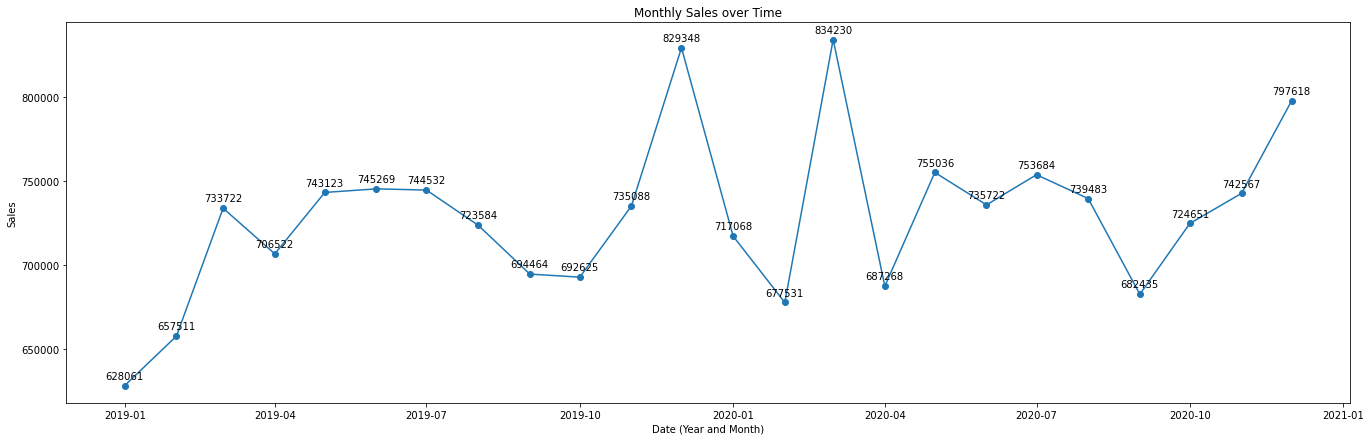

In [67]:
wegmansmonth_overall["monthyear"] =  pd.to_datetime(wegmansmonth_overall["monthyear"])
x = wegmansmonth_overall['monthyear']
y = round(wegmansmonth_overall['SALES'])


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.plot(x, y)

for i, label in enumerate(y):
    plt.annotate(label, (x[i], y[i]+4000),ha='center')

plt.title("Monthly Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Sales")
plt.show()

In [69]:
wegmansmonth_dept['sales_diff'] = wegmansmonth_dept['SALES'] - wegmansmonth_dept['Last Month Sales']

In [70]:
wegmansmonth_dept['salesdiff_perc'] = (wegmansmonth_dept['sales_diff'])/(wegmansmonth_dept['SALES'])

In [71]:
wegmansmonth_dept

,monthyear,DEPARTMENT_NAME,SALES,Last Month Sales,sales_diff,salesdiff_perc
0,2019-01-01,ASIAN,1911.73,0.00,1911.73,1.000000
1,2019-01-01,BAKESHOP,13406.94,0.00,13406.94,1.000000
2,2019-01-01,BEER & WINE COOLERS,10693.57,0.00,10693.57,1.000000
3,2019-01-01,BEVERAGE CONTAINER RETURNS,0.00,0.00,0.00,NaN
4,2019-01-01,BULK FOODS,4063.91,0.00,4063.91,1.000000
...,...,...,...,...,...,...
1048,2020-12-01,"SALADS, SANDWICHES & SOUPS",4992.68,4462.43,530.25,0.106205
1049,2020-12-01,SPECIAL PROMOTIONS,-1047.60,-1116.00,68.40,-0.065292
1050,2020-12-01,SUSHI,6210.93,5822.27,388.66,0.062577
1051,2020-12-01,ULTIMATE COFFEE,306.96,382.02,-75.06,-0.244527


In [72]:
mostchange = wegmansmonth_dept.groupby(['monthyear','DEPARTMENT_NAME'], as_index=False).agg({"salesdiff_perc": "mean"}).sort_values(('salesdiff_perc'), ascending=False)
mostchange = mostchange[mostchange.monthyear != '2019-01-01']
mostchange = mostchange[mostchange.salesdiff_perc.notnull()]
mostchange = mostchange[mostchange.salesdiff_perc != -np.inf]
mostchange = mostchange[(mostchange['monthyear'] >= '2020-01-01')]

In [73]:
mostchange.head(20)

,monthyear,DEPARTMENT_NAME,salesdiff_perc
582,2020-02-01,DIGITAL FULFILLMENT,1.000000
714,2020-05-01,DIGITAL FULFILLMENT,1.000000
1006,2020-11-01,SPECIAL PROMOTIONS,0.876129
647,2020-03-01,PHARMACY OTC,0.854328
559,2020-01-01,PHARMACY OTC,0.837605
740,2020-05-01,RESTAURANTS,0.791217
610,2020-02-01,SPECIAL PROMOTIONS,0.766764
983,2020-11-01,FROZEN MEAT,0.609193
654,2020-03-01,SPECIAL PROMOTIONS,0.586747
868,2020-08-01,PHARMACY RX,0.585109


In [74]:
mostchange.tail(20)

,monthyear,DEPARTMENT_NAME,salesdiff_perc
541,2020-01-01,FRESH SEAFOOD,-0.900387
608,2020-02-01,RESTAURANTS,-0.904350
546,2020-01-01,GM FOR FOOD (HOUSEWARES),-0.932769
531,2020-01-01,CARD DEPARTMENT,-0.951067
918,2020-09-01,SPECIAL PROMOTIONS,-0.994035
912,2020-09-01,PHARMACY RX,-1.039351
628,2020-03-01,FLORAL,-1.177699
652,2020-03-01,RESTAURANTS,-1.204544
619,2020-03-01,CARD DEPARTMENT,-1.281055
736,2020-05-01,PHARMACY RX,-1.285745


In [77]:
lgbmpredactual = wegmanslgbm.groupby(['monthyear'])[['SALES','Prediction']].mean().reset_index()

In [81]:
rfpredactual = wegmansrf.groupby(['monthyear'])[['SALES','Prediction']].sum().reset_index()

In [85]:
rfpredactual = rfpredactual.astype({'SALES': 'int32','Prediction':'int32'})

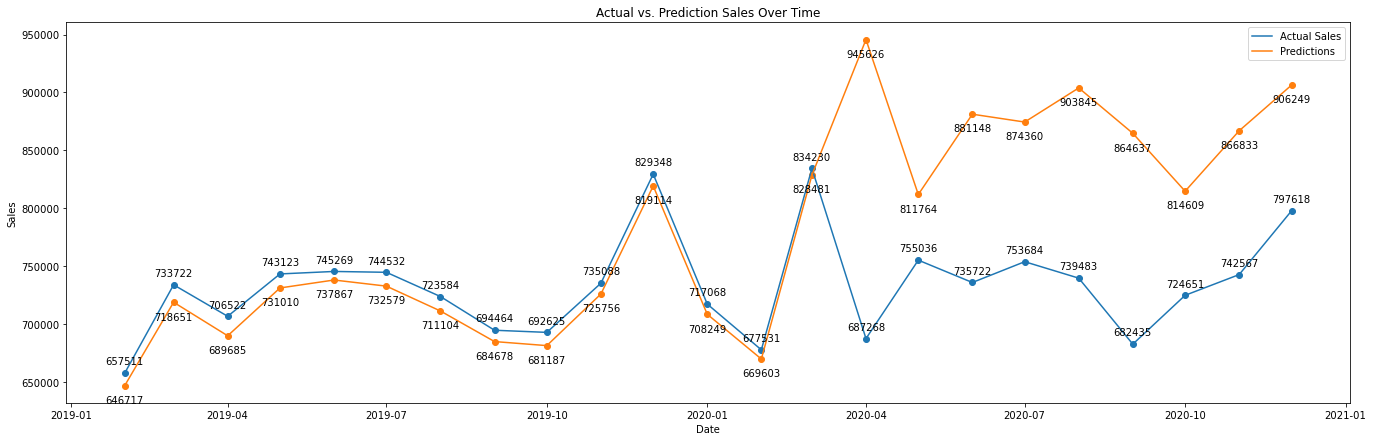

In [196]:
rfpredactual["monthyear"] =  pd.to_datetime(rfpredactual["monthyear"])
x = rfpredactual['monthyear']
y = round(rfpredactual['SALES'])
y1 = round(rfpredactual['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.scatter(x,y1)
plt.plot(x, y)
plt.plot(x, y1)

for i, label in enumerate(y):
    plt.annotate(label, (x[i], y[i]+7500),ha='center')
    
for i, label in enumerate(y1):
    plt.annotate(label, (x[i], y1[i]-15000),ha='center')

plt.title("Actual vs. Prediction Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [221]:
wegmansrf_digital = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'DIGITAL FULFILLMENT')]

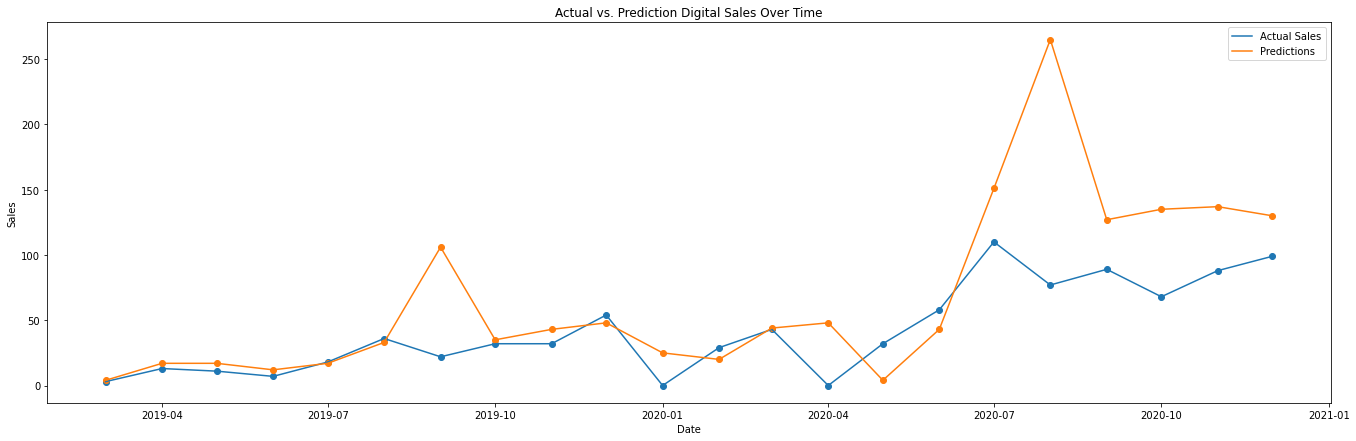

In [222]:
x_date = wegmansrf_digital['monthyear']
y = round(wegmansrf_digital['SALES'])
y_pred = round(wegmansrf_digital['Prediction'])

plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Actual vs. Prediction Digital Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [223]:
wegmansrf_rest = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'RESTAURANTS')]

In [224]:
wegmansrf_rest = wegmansrf_rest.groupby(['monthyear'])[['SALES','Prediction']].sum().reset_index()

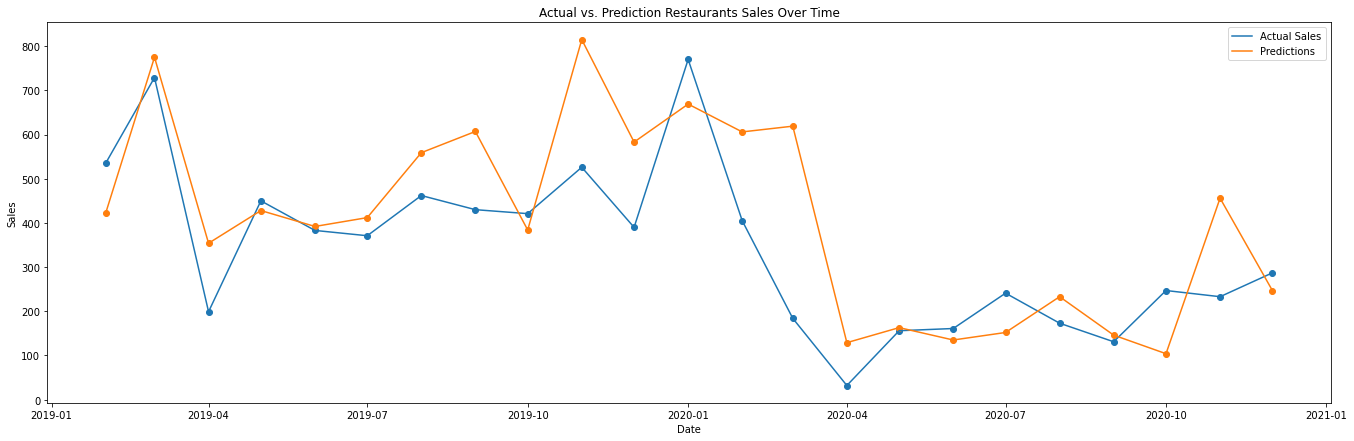

In [226]:
wegmansrf_rest["monthyear"] =  pd.to_datetime(wegmansrf_rest["monthyear"])
x_date = wegmansrf_rest['monthyear']
y = round(wegmansrf_rest['SALES'])
y_pred = round(wegmansrf_rest['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Actual vs. Prediction Restaurants Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [227]:
wegmansrf_restall = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'RESTAURANTS')]

In [228]:
wegmansrf_restamore = wegmansrf_restall[(wegmansrf_restall["CATEGORY_NAME"] == 'AMORE')]

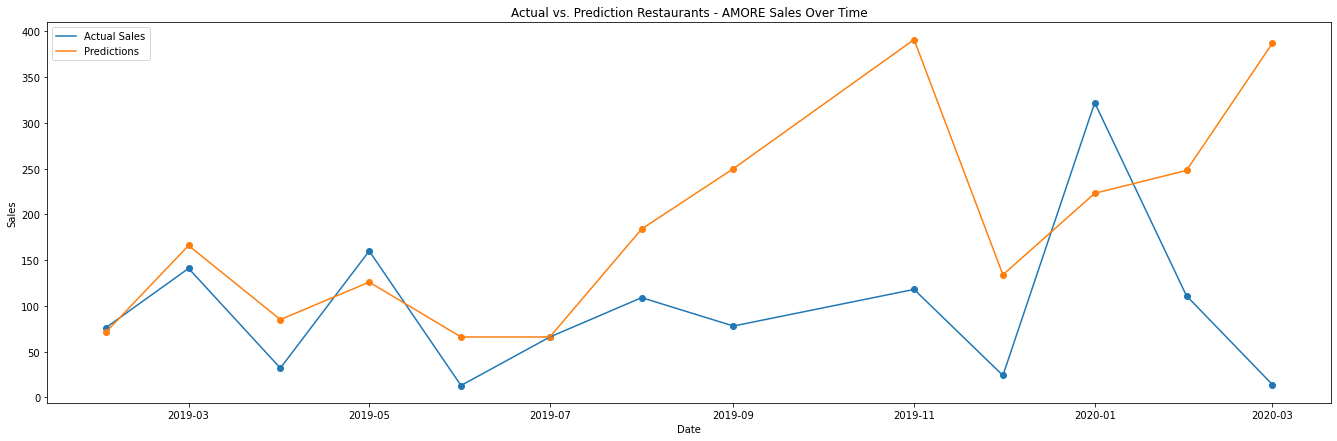

In [234]:
wegmansrf_restamore["monthyear"] =  pd.to_datetime(wegmansrf_restamore["monthyear"])
x_date = wegmansrf_restamore['monthyear']
y = round(wegmansrf_restamore['SALES'])
y_pred = round(wegmansrf_restamore['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Actual vs. Prediction Restaurants - AMORE Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [235]:
wegmansrf_restpub = wegmansrf_restall[(wegmansrf_restall["CATEGORY_NAME"] == 'PUBS')]

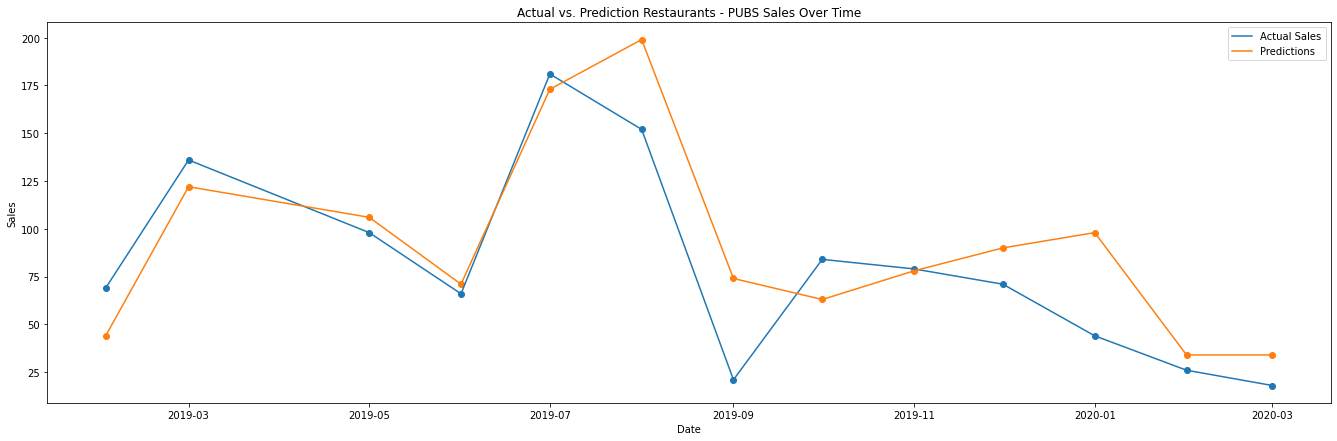

In [237]:
wegmansrf_restpub["monthyear"] =  pd.to_datetime(wegmansrf_restpub["monthyear"])
x_date = wegmansrf_restpub['monthyear']
y = round(wegmansrf_restpub['SALES'])
y_pred = round(wegmansrf_restpub['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Actual vs. Prediction Restaurants - PUBS Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [238]:
wegmansrf_wb = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'WBRAND & OTHER')]

In [239]:
wegmansrf_wb = wegmansrf_wb.groupby(['monthyear'])[['SALES','Prediction']].sum().reset_index()

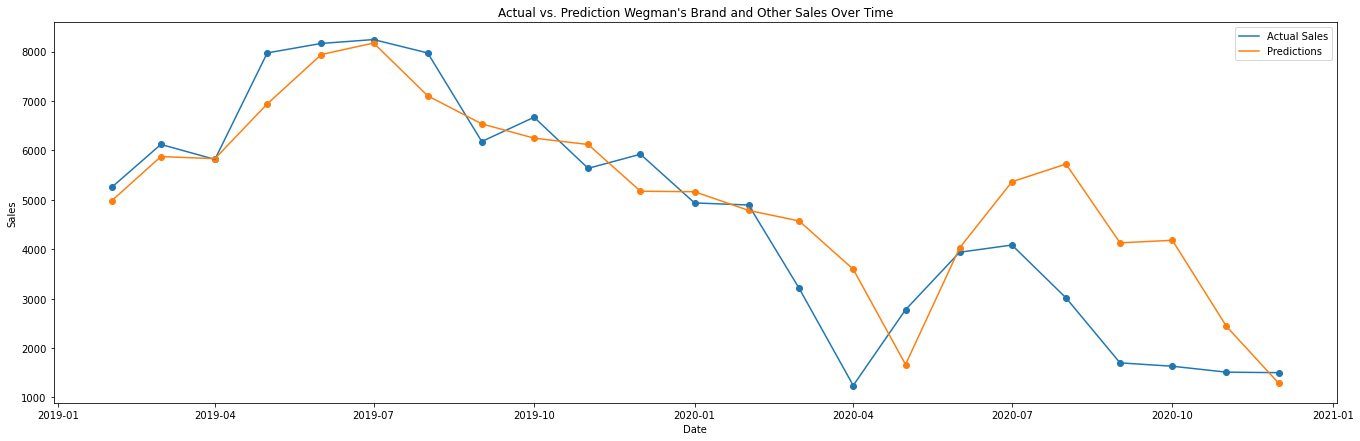

In [241]:
wegmansrf_wb["monthyear"] =  pd.to_datetime(wegmansrf_wb["monthyear"])
x_date = wegmansrf_wb['monthyear']
y = round(wegmansrf_wb['SALES'])
y_pred = round(wegmansrf_wb['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Actual vs. Prediction Wegman's Brand and Other Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [242]:
wegmansrf_wball = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'WBRAND & OTHER')]
wegmanswb_selfserve = wegmansrf_wball[(wegmansrf_wball["CATEGORY_NAME"] == 'SELF-SERVE BARS')]

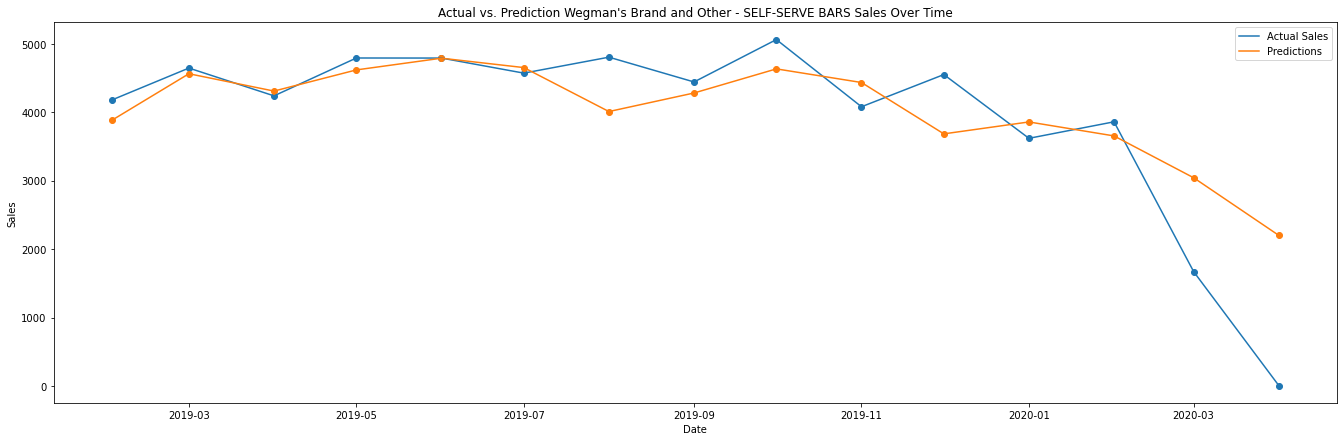

In [243]:
wegmanswb_selfserve["monthyear"] =  pd.to_datetime(wegmanswb_selfserve["monthyear"])
x_date = wegmanswb_selfserve['monthyear']
y = round(wegmanswb_selfserve['SALES'])
y_pred = round(wegmanswb_selfserve['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Actual vs. Prediction Wegman's Brand and Other - SELF-SERVE BARS Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [244]:
wegmansrf_rx = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'PHARMACY RX')]

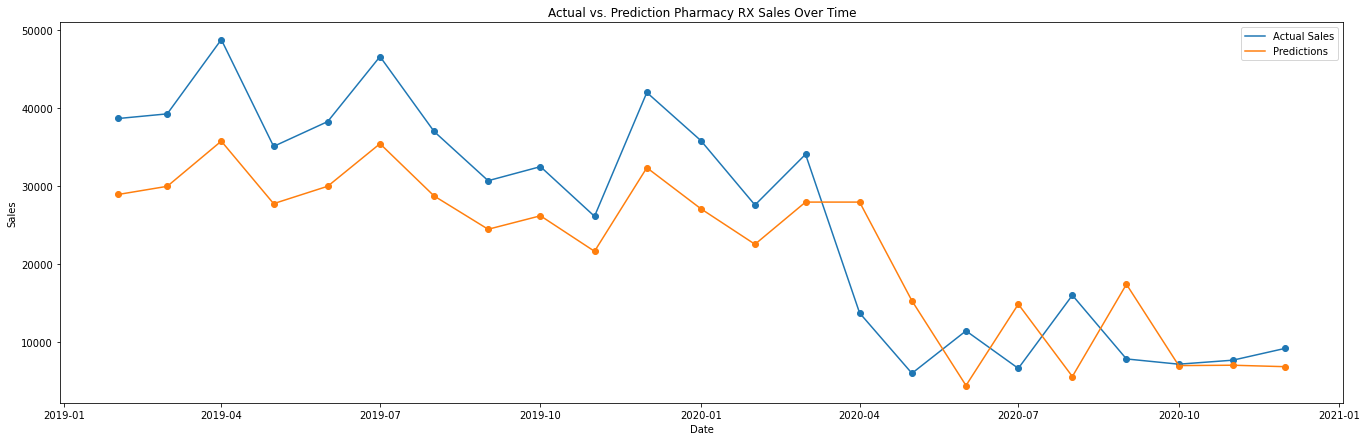

In [251]:
wegmansrf_rx["monthyear"] =  pd.to_datetime(wegmansrf_rx["monthyear"])
x_date = wegmansrf_rx['monthyear']
y = round(wegmansrf_rx['SALES'])
y_pred = round(wegmansrf_rx['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Actual vs. Prediction Pharmacy RX Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [264]:
wegmansrf_otc = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'PHARMACY OTC')]

In [266]:
topsales_otc = wegmansrf_otc
topsales_otc['CHANGE_IN_SALES'] = ((topsales_otc['SALES']-topsales_otc['Last Month Sales'])/topsales_otc['SALES'])
topsales_otc.groupby(['CATEGORY_NAME'])[['CHANGE_IN_SALES']].mean().sort_values(('CHANGE_IN_SALES'), ascending=False)

,CHANGE_IN_SALES
CATEGORY_NAME,
PHARMACY OTC PRODUCTS,-0.645898
PHARMACY OTC CODED SALES,-1.365778
DIABETICARE PRODUCTS,-inf


In [268]:
wegmansrf_otcsales = wegmansrf_otc[(wegmansrf_otc["CATEGORY_NAME"] == 'PHARMACY OTC CODED SALES')]

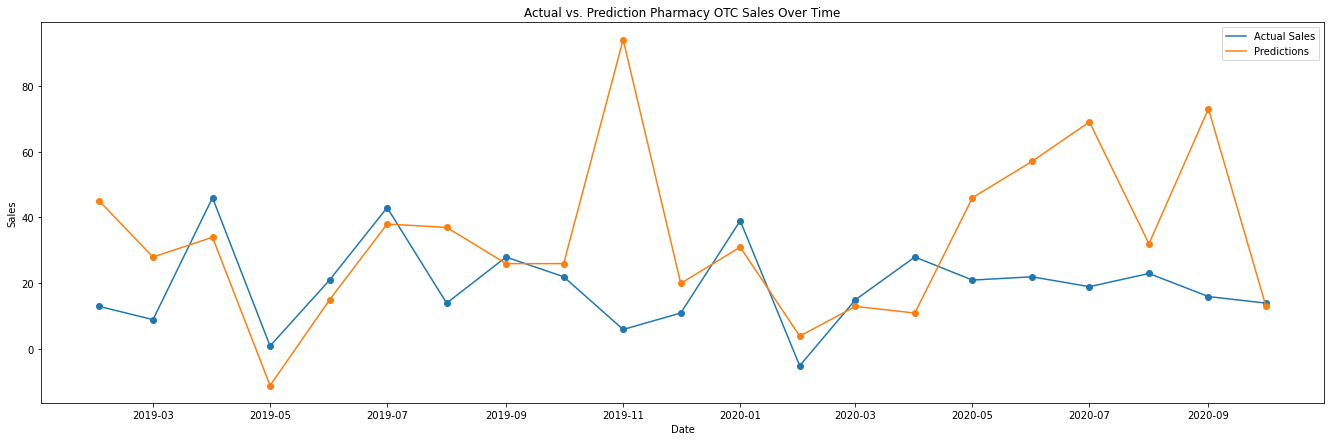

In [270]:
wegmansrf_otcsales["monthyear"] =  pd.to_datetime(wegmansrf_otcsales["monthyear"])
x_date = wegmansrf_otcsales['monthyear']
y = round(wegmansrf_otcsales['SALES'])
y_pred = round(wegmansrf_otcsales['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Actual vs. Prediction Pharmacy OTC Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [128]:
wegmansrf['Residual'] = wegmansrf['SALES'] - wegmansrf['Prediction']

In [137]:
rfresidual = wegmansrf.groupby(['monthyear'])[['Residual']].mean().reset_index()

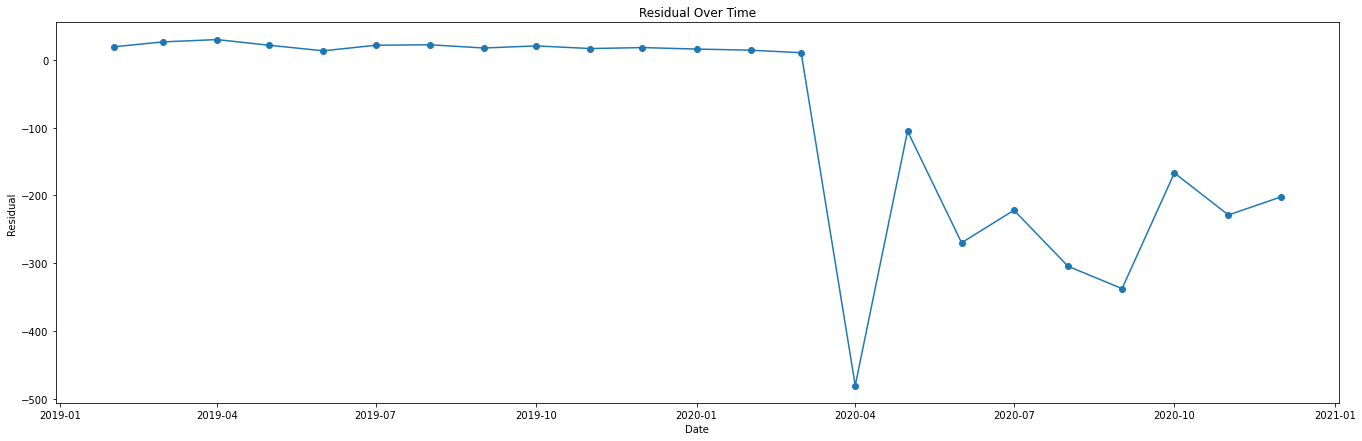

In [141]:
rfresidual["monthyear"] =  pd.to_datetime(rfresidual["monthyear"])
x = rfresidual['monthyear']
y = rfresidual['Residual']


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.plot(x,y)

plt.title("Residual Over Time")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.show()

In [129]:
wegmansrf

,monthyear,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Last Month Sales,CATCODES,DEPTCODES,Prediction,Residual
554,2019-02-01,ASIAN,ASIAN HOT,53.70,31.51,15,0,80.0,-26.30
555,2019-02-01,ASIAN,ASIAN PACKAGED,1753.13,1880.22,16,0,1607.0,146.13
556,2019-02-01,BAKESHOP,BAGELS,388.73,1845.58,24,1,909.0,-520.27
557,2019-02-01,BAKESHOP,BAKESHOP COOKIES,1521.38,1200.90,27,1,1430.0,91.38
558,2019-02-01,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,747.84,709.93,28,1,882.0,-134.16
...,...,...,...,...,...,...,...,...,...
13300,2020-12-01,ULTIMATE COFFEE,BREAKFAST,80.40,123.12,53,42,116.0,-35.60
13301,2020-12-01,ULTIMATE COFFEE,COLD DRINKS,41.11,46.37,114,42,59.0,-17.89
13302,2020-12-01,ULTIMATE COFFEE,HOT DRINKS,166.75,178.69,272,42,134.0,32.75
13303,2020-12-01,ULTIMATE COFFEE,RETAIL ITEMS,18.70,33.09,442,42,37.0,-18.30


In [149]:
mostRESchange = wegmansrf[(wegmansrf['monthyear'] >= '2020-03-01')]

In [150]:
mostRESchange

,monthyear,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Last Month Sales,CATCODES,DEPTCODES,Prediction,Residual
7891,2020-03-01,ASIAN,ASIAN HOT,54.52,42.20,15,0,71.0,-16.48
7892,2020-03-01,ASIAN,ASIAN PACKAGED,1461.01,1700.55,16,0,3856.0,-2394.99
7893,2020-03-01,BAKESHOP,BAGELS,585.25,1892.10,24,1,1134.0,-548.75
7894,2020-03-01,BAKESHOP,BAKESHOP COOKIES,1482.43,1575.83,27,1,1763.0,-280.57
7895,2020-03-01,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,1054.63,785.94,28,1,930.0,124.63
...,...,...,...,...,...,...,...,...,...
13300,2020-12-01,ULTIMATE COFFEE,BREAKFAST,80.40,123.12,53,42,116.0,-35.60
13301,2020-12-01,ULTIMATE COFFEE,COLD DRINKS,41.11,46.37,114,42,59.0,-17.89
13302,2020-12-01,ULTIMATE COFFEE,HOT DRINKS,166.75,178.69,272,42,134.0,32.75
13303,2020-12-01,ULTIMATE COFFEE,RETAIL ITEMS,18.70,33.09,442,42,37.0,-18.30


In [157]:
diff_res = wegmansrf.groupby(['monthyear','DEPARTMENT_NAME'], as_index=False).agg({"Residual": "mean"}).sort_values(('Residual'), ascending=False)

In [158]:
diff_res.head(20)

,monthyear,DEPARTMENT_NAME,Residual
121,2019-04-01,PHARMACY RX,13013.820
253,2019-07-01,PHARMACY RX,11164.880
825,2020-08-01,PHARMACY RX,10415.000
33,2019-02-01,PHARMACY RX,9729.880
473,2019-12-01,PHARMACY RX,9640.080
77,2019-03-01,PHARMACY RX,9284.840
517,2020-01-01,PHARMACY RX,8731.100
209,2019-06-01,PHARMACY RX,8289.110
297,2019-08-01,PHARMACY RX,8264.180
165,2019-05-01,PHARMACY RX,7336.280


In [159]:
diff_res.tail(20)

,monthyear,DEPARTMENT_NAME,Residual
709,2020-06-01,COLD CUTS & CHEESE,-1305.835000
654,2020-04-01,"SALADS, SANDWICHES & SOUPS",-1309.608000
621,2020-04-01,COLD CUTS & CHEESE,-1315.646154
848,2020-09-01,EGGS,-1339.540000
929,2020-11-01,COLD CUTS & CHEESE,-1357.152500
827,2020-08-01,PRODUCE,-1374.204118
996,2020-12-01,ITALIAN,-1402.370000
820,2020-08-01,ITALIAN,-1605.420000
908,2020-10-01,ITALIAN,-1638.815000
600,2020-03-01,ITALIAN,-1779.290000


In [164]:
wegmansrf_italian = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'ITALIAN')]

In [165]:
wegmansrf_italian = wegmansrf_italian.groupby(['monthyear'])[['SALES','Prediction']].mean().reset_index()

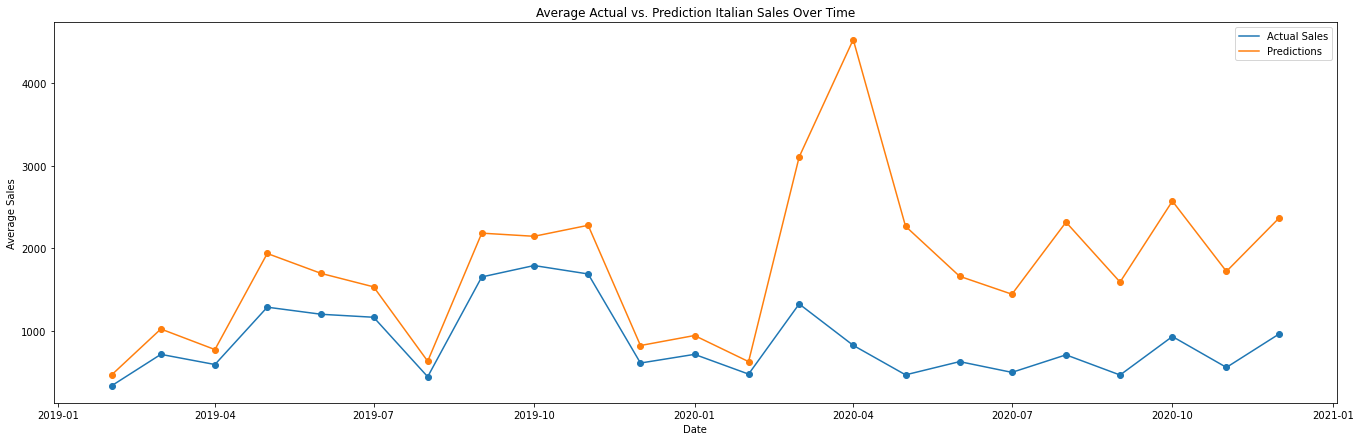

In [167]:
wegmansrf_italian["monthyear"] =  pd.to_datetime(wegmansrf_italian["monthyear"])
x_date = wegmansrf_italian['monthyear']
y = round(wegmansrf_italian['SALES'])
y_pred = round(wegmansrf_italian['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Italian Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [180]:
wegmansrf_italianall = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'ITALIAN')]

In [181]:
topsales_italian = wegmansrf_italianall
topsales_italian['CHANGE_IN_SALES'] = ((topsales_italian['SALES']-topsales_italian['Last Month Sales'])/topsales_italian['SALES'])
topsales_italian.groupby(['CATEGORY_NAME'])[['CHANGE_IN_SALES']].mean().sort_values(('CHANGE_IN_SALES'), ascending=False)

,CHANGE_IN_SALES
CATEGORY_NAME,
CHOOSE YOUR MEAL,0.500000
ITALIAN MEALS,-0.275098
PASTA,-1.170054
ITALIAN CATERING,-2.291435


In [182]:
wegmansrf_italianCATE = wegmansrf_italianall[(wegmansrf_italianall["CATEGORY_NAME"] == 'ITALIAN CATERING')]

In [185]:
wegmansrf_italianPASTA = wegmansrf_italianall[(wegmansrf_italianall["CATEGORY_NAME"] == 'PASTA')]

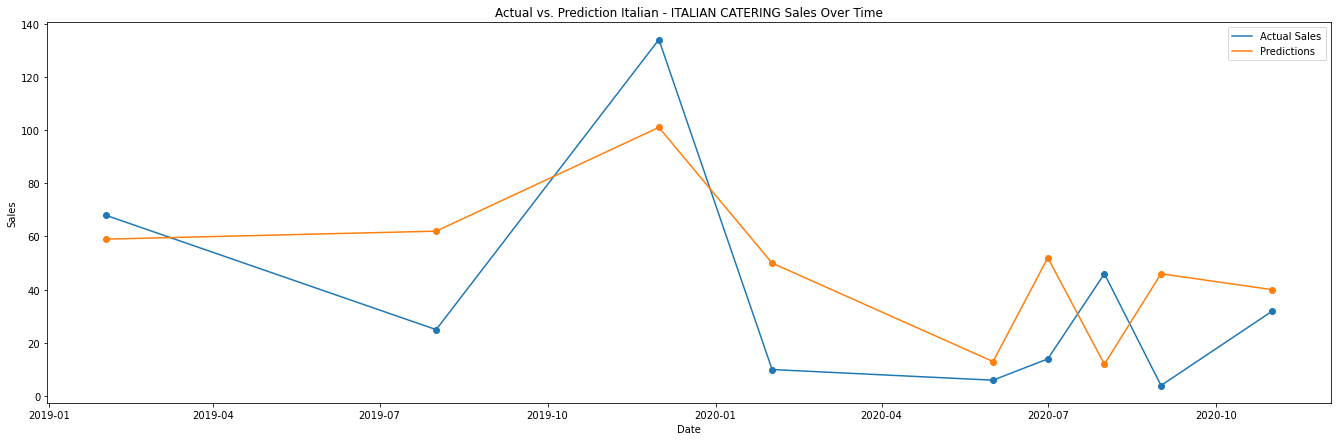

In [271]:
wegmansrf_italianCATE["monthyear"] =  pd.to_datetime(wegmansrf_italianCATE["monthyear"])
x_date = wegmansrf_italianCATE['monthyear']
y = round(wegmansrf_italianCATE['SALES'])
y_pred = round(wegmansrf_italianCATE['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Actual vs. Prediction Italian - ITALIAN CATERING Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

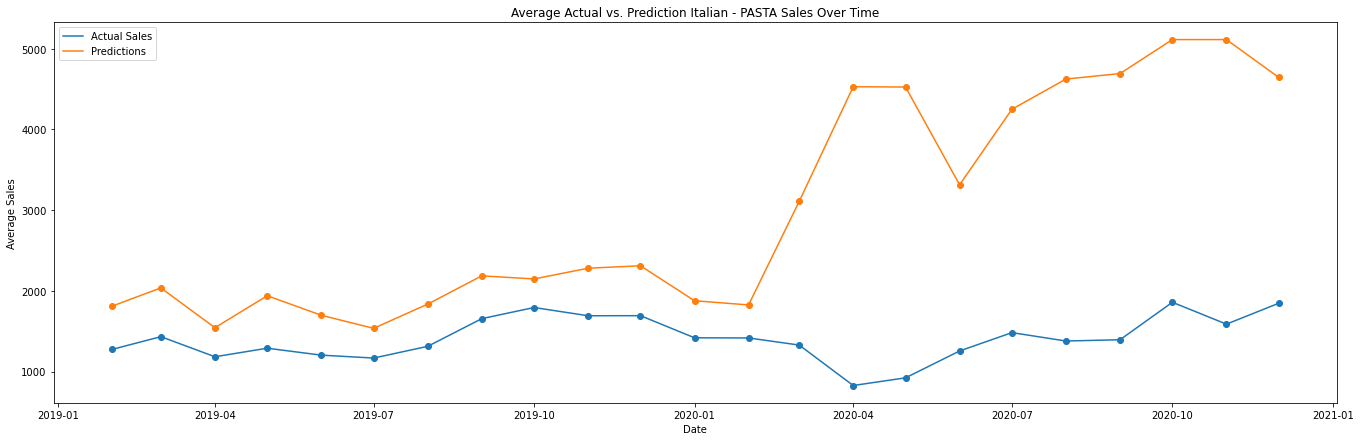

In [186]:
wegmansrf_italianPASTA["monthyear"] =  pd.to_datetime(wegmansrf_italianPASTA["monthyear"])
x_date = wegmansrf_italianPASTA['monthyear']
y = round(wegmansrf_italianPASTA['SALES'])
y_pred = round(wegmansrf_italianPASTA['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Italian - PASTA Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()